In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions

from Bio.PDB.PDBParser import PDBParser
sys.path.insert(0, '/Users/weilu/Research/opt_server/')
from pyCodeLib import *
%matplotlib inline
plt.rcParams['figure.figsize'] = np.array([10,6.180])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

# narrow down the training set to single chain.
## in order to get MSA data.(also, I can do more shuffling with smaller proteins)

In [2]:
data = pd.read_csv("/Users/weilu/Research/database/para_anti_para_with_six_letter_code.csv", index_col=0)

In [3]:
# remove all that chain1 is different from chain2
selected = data.query("Chain1 == Chain2").reset_index(drop=True)

In [4]:
# then group by protein, select the chain occured most frequent.
selected_chain = selected.groupby("Protein")["Chain1"].apply(pd.Series.mode).reset_index().query("level_1 == 0")

In [5]:
# keep those that selected.
selected_chain["pair"] = selected_chain["Protein"] + "_" + selected_chain["Chain1"]
pair_list = selected_chain["pair"].to_list()
selected["pair"] = selected["Protein"] + "_" + selected["Chain1"]
s2 = selected.query("pair in @pair_list")

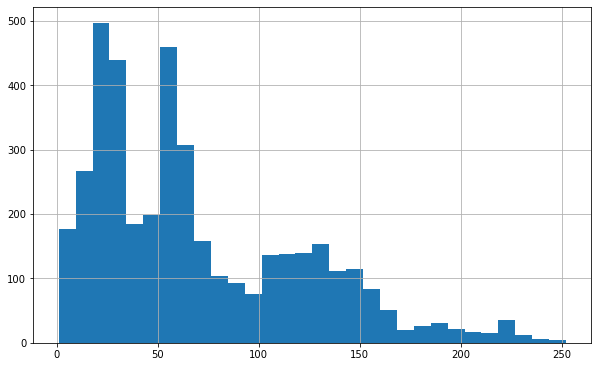

In [6]:
s2["Protein"].value_counts().hist(bins=30)

In [7]:
unique_structure_pdbs = pd.read_csv("/Users/weilu/Research/database/proteins-2020-08-18.csv")

In [8]:
unique_structure_pdbs["Protein"] = unique_structure_pdbs["pdbid"].apply(lambda x: x[2:6])

In [9]:
unique_structure_pdb_id = unique_structure_pdbs["Protein"].to_list()
s3 = s2.query("Protein in @unique_structure_pdb_id")

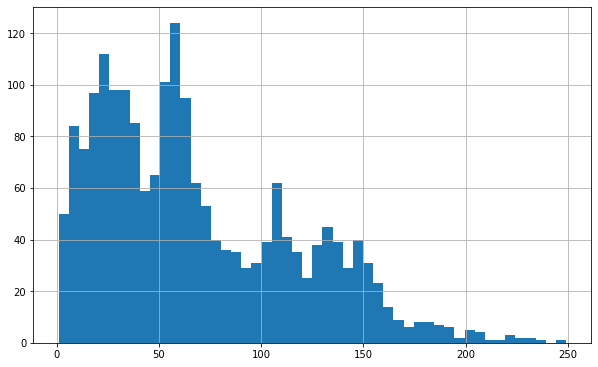

In [10]:
s3["Protein"].value_counts().hist(bins=50)

In [11]:
s3["Protein"].unique().shape

(1956,)

In [12]:
# s3.to_csv("/Users/weilu/Research/database/gxxxg_s3.csv")
# pd.read_csv("/Users/weilu/Research/database/gxxxg_s3.csv", index_col=0)
t = s3["pair"].unique()
protein, chain = t[0].split("_")

In [13]:
# 4hfi is ok
# s3.query("Protein=='4hfi'")

In [14]:
interaction_count = s3["Protein"].value_counts().reset_index()

In [15]:
filtered_pdbs = interaction_count.query("Protein > 15")["index"].to_list()

In [16]:
s4 = s3.query("Protein in @filtered_pdbs")

In [17]:
# s4.to_csv("/Users/weilu/Research/database/gxxxg_s4.csv")
# pd.read_csv("/Users/weilu/Research/database/gxxxg_s4.csv", index_col=0)

In [18]:
s4["pair"].unique().shape

(1747,)

In [19]:
a = s4.groupby(["Res1_1", "Res1_2", "Res2_1", "Res2_2", "Direction"])["Protein"].count().reset_index().sort_values("Protein")

In [25]:
s4

,index,Index1_1,Res1_1,Index2_1,Res2_1,Index1_2,Res1_2,Index2_2,Res2_2,Res1,Chain1,Res2,Chain2,rij,rij_2,Protein,Direction,interaction_index,code,pair
41,319,209,MET,252,PHE,213,ILE,248,VAL,44,B,91,B,5.343194,5.318576,3cap,anti,12,301,3cap_B
42,320,209,MET,256,LEU,213,ILE,252,PHE,44,B,95,B,6.288851,6.254056,3cap,anti,12,301,3cap_B
43,321,212,LEU,252,PHE,216,GLY,248,VAL,47,B,91,B,4.410215,5.070871,3cap,anti,77,100201,3cap_B
44,326,213,ILE,253,THR,217,PHE,249,PHE,48,B,92,B,5.502128,6.142965,3cap,anti,39,10102,3cap_B
45,336,216,GLY,248,VAL,220,ASN,244,ASP,51,B,87,B,5.070871,3.861909,3cap,anti,76,100120,3cap_B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600241,2277753,555,LEU,748,THR,559,PHE,752,ALA,317,B,681,B,5.458916,5.365570,6c96,parallel,58,20101,6c96_B
600242,2277757,558,VAL,748,THR,562,PHE,752,ALA,320,B,681,B,4.720123,4.583742,6c96,parallel,58,20101,6c96_B
600243,2277758,558,VAL,752,ALA,562,PHE,756,GLU,320,B,685,B,5.797050,5.380803,6c96,parallel,40,10111,6c96_B
600244,2277779,601,TYR,639,ALA,605,LEU,643,LEU,480,B,519,B,5.407334,5.468802,6c96,parallel,42,10201,6c96_B


In [21]:
a

,Res1_1,Res1_2,Res2_1,Res2_2,Direction,Protein
30729,TRP,SER,PHE,ILE,anti,1
14862,LEU,ARG,VAL,ILE,anti,1
14861,LEU,ARG,VAL,GLY,anti,1
14858,LEU,ARG,TYR,LEU,parallel,1
14856,LEU,ARG,TRP,LYS,parallel,1
...,...,...,...,...,...,...
18287,LEU,VAL,LEU,LEU,anti,72
34173,VAL,LEU,LEU,LEU,anti,84
8991,GLY,GLY,ALA,ALA,parallel,86
15049,LEU,ASP,LEU,SER,anti,105


In [33]:
a.query("Direction =='anti'").shape

(22168, 6)

In [29]:
a.query("Protein > 1").shape

(21004, 6)

In [39]:
a.query("Protein > 3").shape

(10657, 6)

In [30]:
a.query("Protein > 5").shape

(6384, 6)

In [31]:
a.query("Protein > 10").shape

(2434, 6)

In [40]:
a.query("Protein > 20").shape

(619, 6)

In [35]:
a["Protein"].sum()

132497

In [36]:
a.query("Protein > 1")["Protein"].sum()

117598

In [42]:
a.query("Protein > 3")["Protein"].sum()

92888

In [37]:
a.query("Protein > 10")["Protein"].sum()

44400

In [41]:
a.query("Protein > 20")["Protein"].sum()

18420

In [ ]:
# let's do top 200 for both anti and parallel.


In [157]:
from Bio.PDB.Polypeptide import one_to_index
from Bio.PDB.Polypeptide import three_to_index

def encode_resName(data):
    # if anti-parallel, the order by reading from res2_2 to res2_1
    if data["Direction"] == "anti":
        res2 = three_to_index(data["Res2_2"])*20 + three_to_index(data["Res2_1"])
        data["Res2_letter"] = data["Res2_2"] + "_" + data["Res2_1"]
    elif data["Direction"] == "parallel":
        res2 = three_to_index(data["Res2_1"])*20 + three_to_index(data["Res2_2"])
        data["Res2_letter"] = data["Res2_1"] + "_" + data["Res2_2"]
    res1 = three_to_index(data["Res1_1"])*20 + three_to_index(data["Res1_2"])
    data["Res1_letter"] = data["Res1_1"] + "_" + data["Res1_2"]
    # if res2 index is smaller than res1, We will swtich the index. to ensure res1 is less than res2.
    if res2 < res1:
        data["Res1"] = res2
        data["Res2"] = res1
    else:
        data["Res1"] = res1
        data["Res2"] = res2
    return data

In [158]:
a = a.apply(encode_resName, axis=1)
b = a.groupby(["Res1", "Res2", "Direction"])["Protein"].sum().reset_index()
a_info = a.groupby(["Res1", "Res2", "Direction"]).head(1).reset_index(drop=True)
a_info = a_info[['Res1_1', 'Res1_2', 'Res2_1', 'Res2_2', 'Direction',
       'Res2_letter', 'Res1_letter', 'Res1', 'Res2']]
b = b.merge(a_info)

In [180]:
def get_table(data):
    table = np.zeros((400,400))
    for i, line in data.iterrows():
        x = line["Res1"]
        y = line["Res2"]

        table[x][y] += line["Protein"]
        if x != y:
            table[y][x] += line["Protein"]
    return table
def get_info(data):
    table = get_table(data)
    info = []
    for i in range(400):
        res1 = index_to_three(i // 20)
        res2 = index_to_three(i % 20)
        info.append([i, res1, res2])
    info = pd.DataFrame(info, columns=["i", "res1", "res2"])
    info["order"] = np.sum(table, axis=0)
    info = info.sort_values("order", ascending=False).reset_index(drop=True).reset_index()
    return info

In [196]:
from Bio.PDB.Polypeptide import index_to_three
data = b.query("Direction=='parallel'")
para_table = get_table(data)
para_info = get_info(data)
para_info["Direction"] = 'parallel'

data = b.query("Direction=='anti'")
anti_table = get_table(data)
anti_info = get_info(data)
anti_info["Direction"] = 'anti'


from sklearn.cluster import KMeans
para_table_new = para_table + 1
para_table_log = -np.log(para_table_new)
X = para_table_log
# kmeans = KMeans(n_clusters=20, random_state=0).fit(X)
kmeans = KMeans(n_clusters=20, random_state=123).fit(X)
# kmeans = KMeans(n_clusters=20, random_state=229).fit(X)
x_label = kmeans.predict(X)
para_info = para_info.sort_values("i").reset_index(drop=True)
para_info["Group"] = x_label

from sklearn.cluster import KMeans
anti_table_new = anti_table + 1
anti_table_log = -np.log(anti_table_new)
X = anti_table_log
# kmeans = KMeans(n_clusters=20, random_state=0).fit(X)
kmeans = KMeans(n_clusters=20, random_state=123).fit(X)
# kmeans = KMeans(n_clusters=20, random_state=229).fit(X)
x_label = kmeans.predict(X)
anti_info = anti_info.sort_values("i").reset_index(drop=True)
anti_info["Group"] = x_label

a = pd.concat([para_info, anti_info]).reset_index(drop=True)
a.to_csv("/Users/weilu/Research/database/single_chain_gxxxg_index_dic.csv")

In [220]:
from sklearn.cluster import KMeans
para_table_new = para_table + 1
para_table_new = para_table_new / para_table_new.sum(axis=1).reshape(-1, 1)
para_table_log = -np.log(para_table_new)
X = para_table_log
# kmeans = KMeans(n_clusters=20, random_state=0).fit(X)

# kmeans = KMeans(n_clusters=20, random_state=1234).fit(X)
# # kmeans = KMeans(n_clusters=20, random_state=229).fit(X)
# x_label = kmeans.predict(X)
# para_info = para_info.sort_values("i").reset_index(drop=True)
# para_info["Group"] = x_label

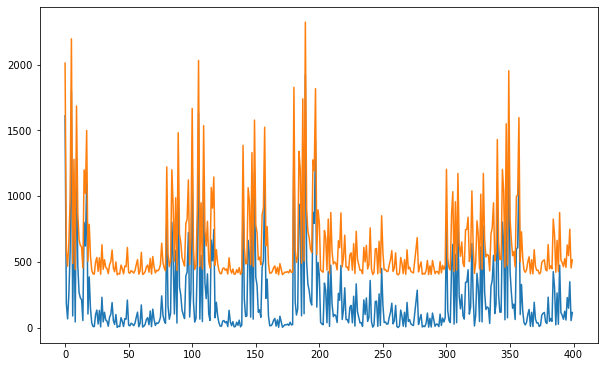

In [259]:
plt.rcParams['figure.figsize'] = np.array([10,6.180])    #golden ratio
plt.plot(para_table.sum(axis=1))
plt.plot((para_table+1).sum(axis=1))

In [255]:
(para_table!=0).sum()

22501

In [250]:
X = para_table_log
score_max = -100000
from sklearn.cluster import KMeans
for i in range(100):
    kmeans = KMeans(n_clusters=30, random_state=i).fit(X)
    score = kmeans.score(X)
    # print("score", score, i)
    if score > score_max:
        score_max = score
        keep_kmeans = kmeans

In [246]:
print(score_max)

-19860.04252407423


In [234]:
print(score_max)

-19913.890326650937


In [251]:
para_info = para_info.sort_values("i").reset_index(drop=True)
x_label = keep_kmeans.predict(X)
para_info["Group"] = x_label

In [219]:
para_info.query("Group==3")

,index,i,res1,res2,order,Direction,Group
0,3,0,ALA,ALA,1611.0,parallel,3
5,1,5,ALA,GLY,1796.0,parallel,3
100,9,100,GLY,ALA,1266.0,parallel,3
105,2,105,GLY,GLY,1632.0,parallel,3


In [232]:
para_info.query("Group==13")

,index,i,res1,res2,order,Direction,Group
105,2,105,GLY,GLY,1632.0,parallel,13


In [253]:
para_info.query("Group==25")

,index,i,res1,res2,order,Direction,Group
100,9,100,GLY,ALA,1266.0,parallel,25
105,2,105,GLY,GLY,1632.0,parallel,25


In [252]:
para_info.query("res1=='GLY'")

,index,i,res1,res2,order,Direction,Group
100,9,100,GLY,ALA,1266.0,parallel,25
101,123,101,GLY,CYS,196.0,parallel,3
102,286,102,GLY,ASP,41.0,parallel,7
103,229,103,GLY,GLU,71.0,parallel,7
104,54,104,GLY,PHE,489.0,parallel,12
105,2,105,GLY,GLY,1632.0,parallel,25
106,239,106,GLY,HIS,64.0,parallel,7
107,48,107,GLY,ILE,549.0,parallel,6
108,277,108,GLY,LYS,45.0,parallel,7
109,13,109,GLY,LEU,1136.0,parallel,22


In [200]:
para_info.query("res1=='GLY'")

,index,i,res1,res2,order,Direction,Group
100,9,100,GLY,ALA,1266.0,parallel,3
101,123,101,GLY,CYS,196.0,parallel,2
102,286,102,GLY,ASP,41.0,parallel,5
103,229,103,GLY,GLU,71.0,parallel,5
104,54,104,GLY,PHE,489.0,parallel,1
105,2,105,GLY,GLY,1632.0,parallel,3
106,239,106,GLY,HIS,64.0,parallel,5
107,48,107,GLY,ILE,549.0,parallel,6
108,277,108,GLY,LYS,45.0,parallel,5
109,13,109,GLY,LEU,1136.0,parallel,12


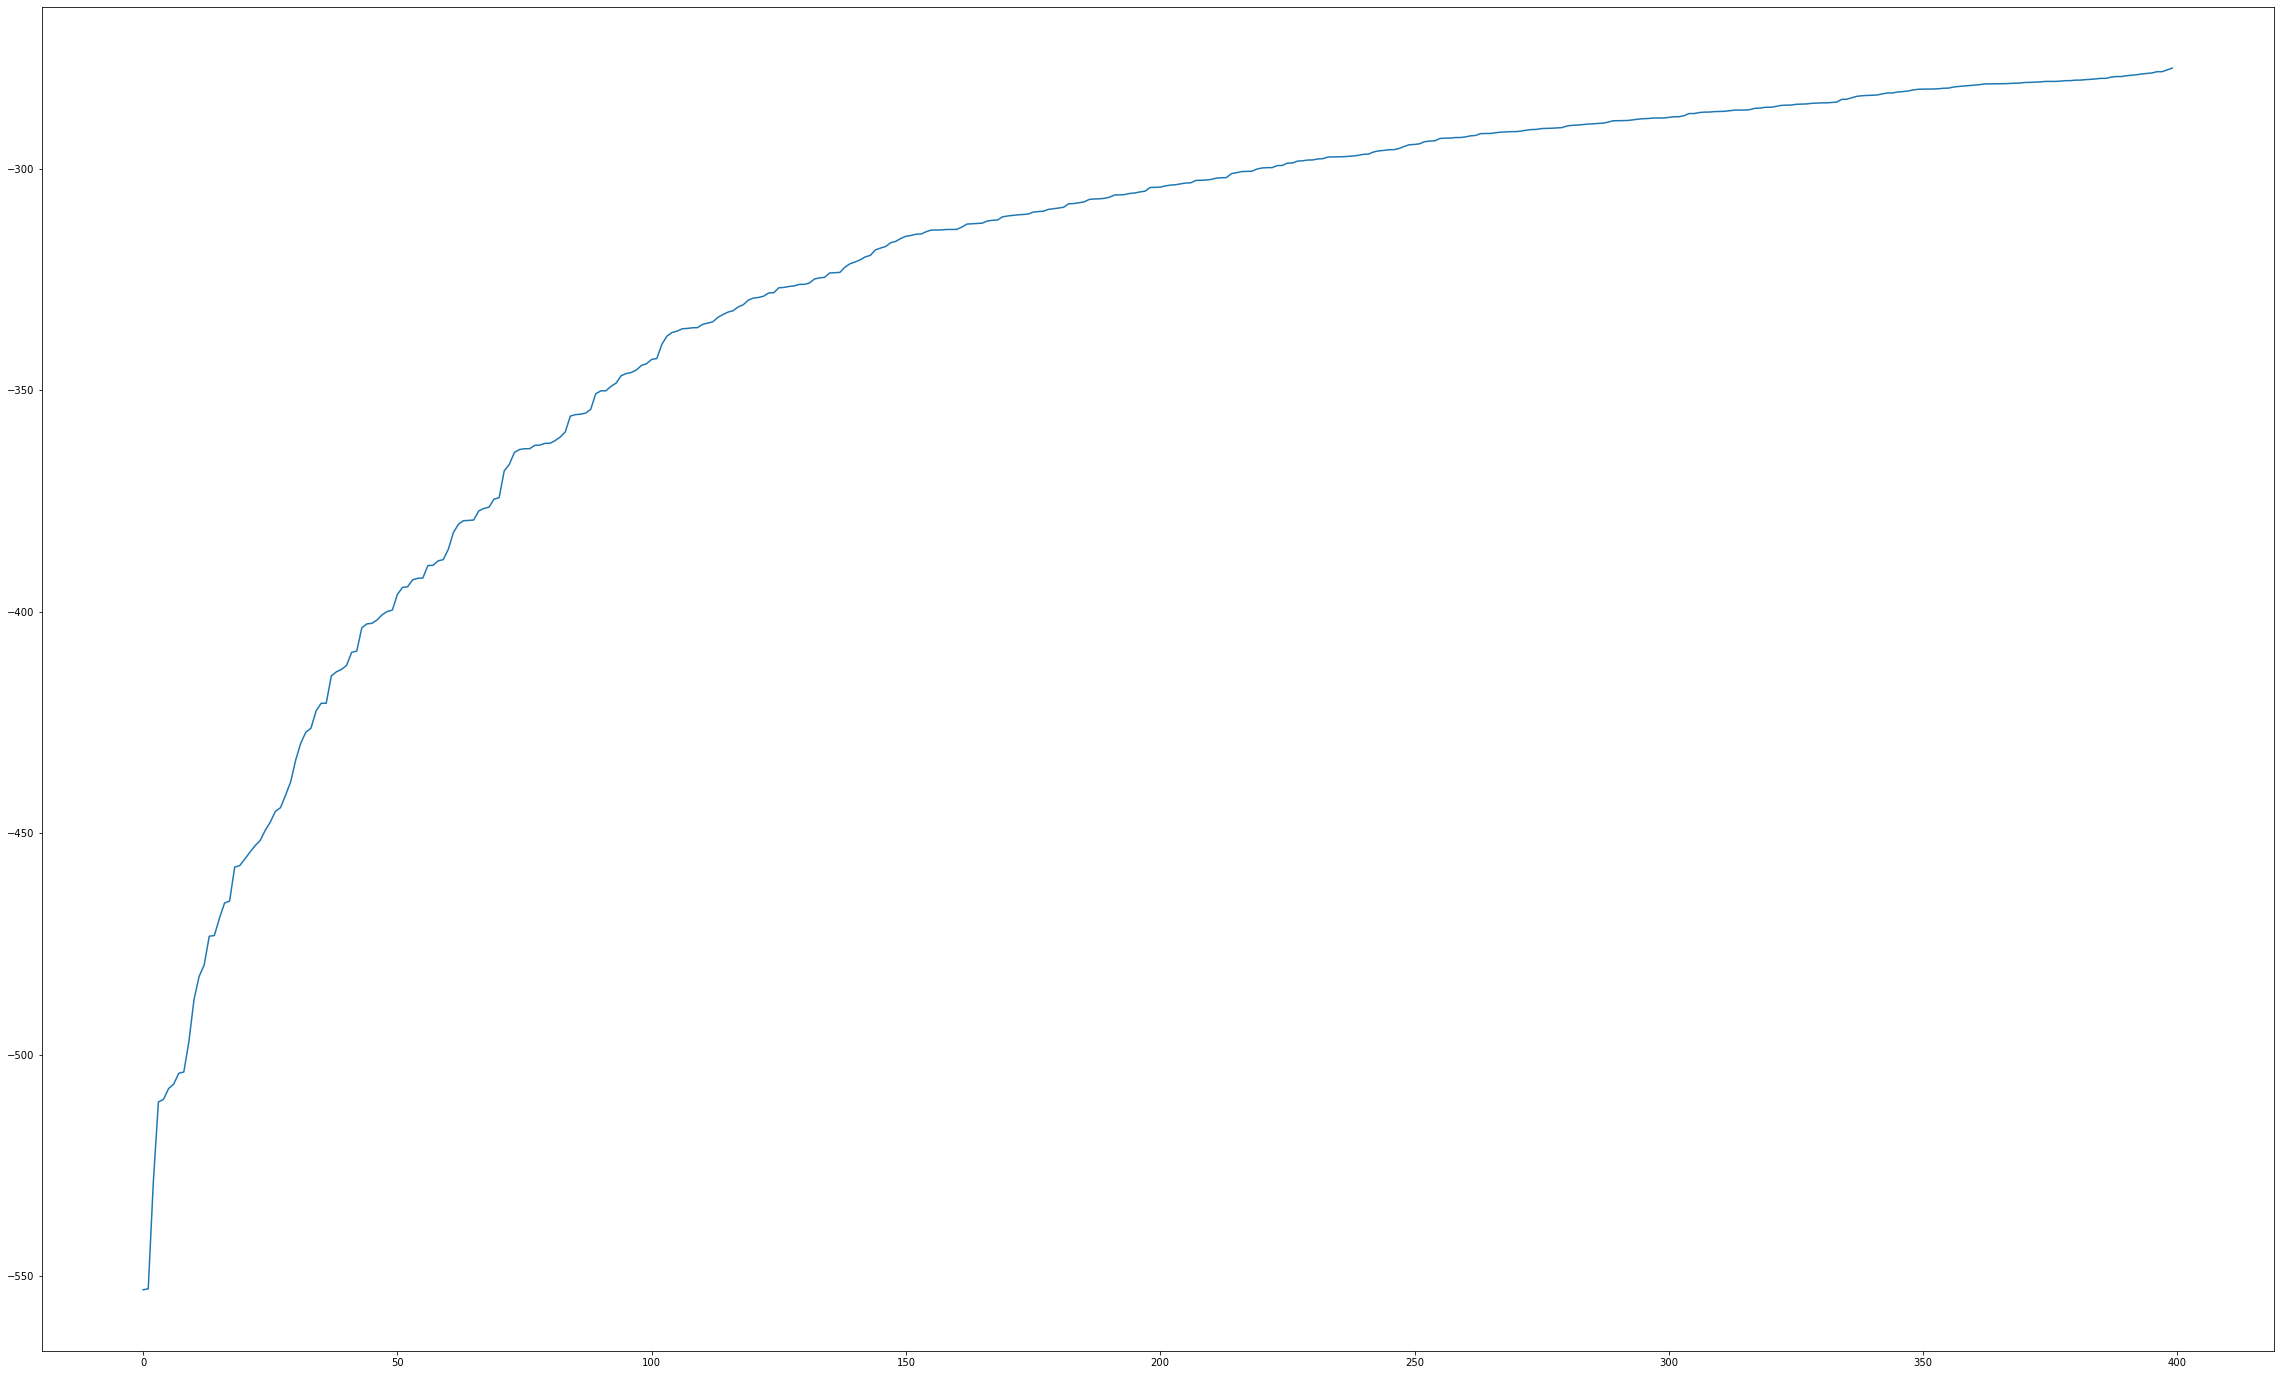

In [195]:
t = X.sum(axis=0)
t = sorted(t)
plt.plot(t)

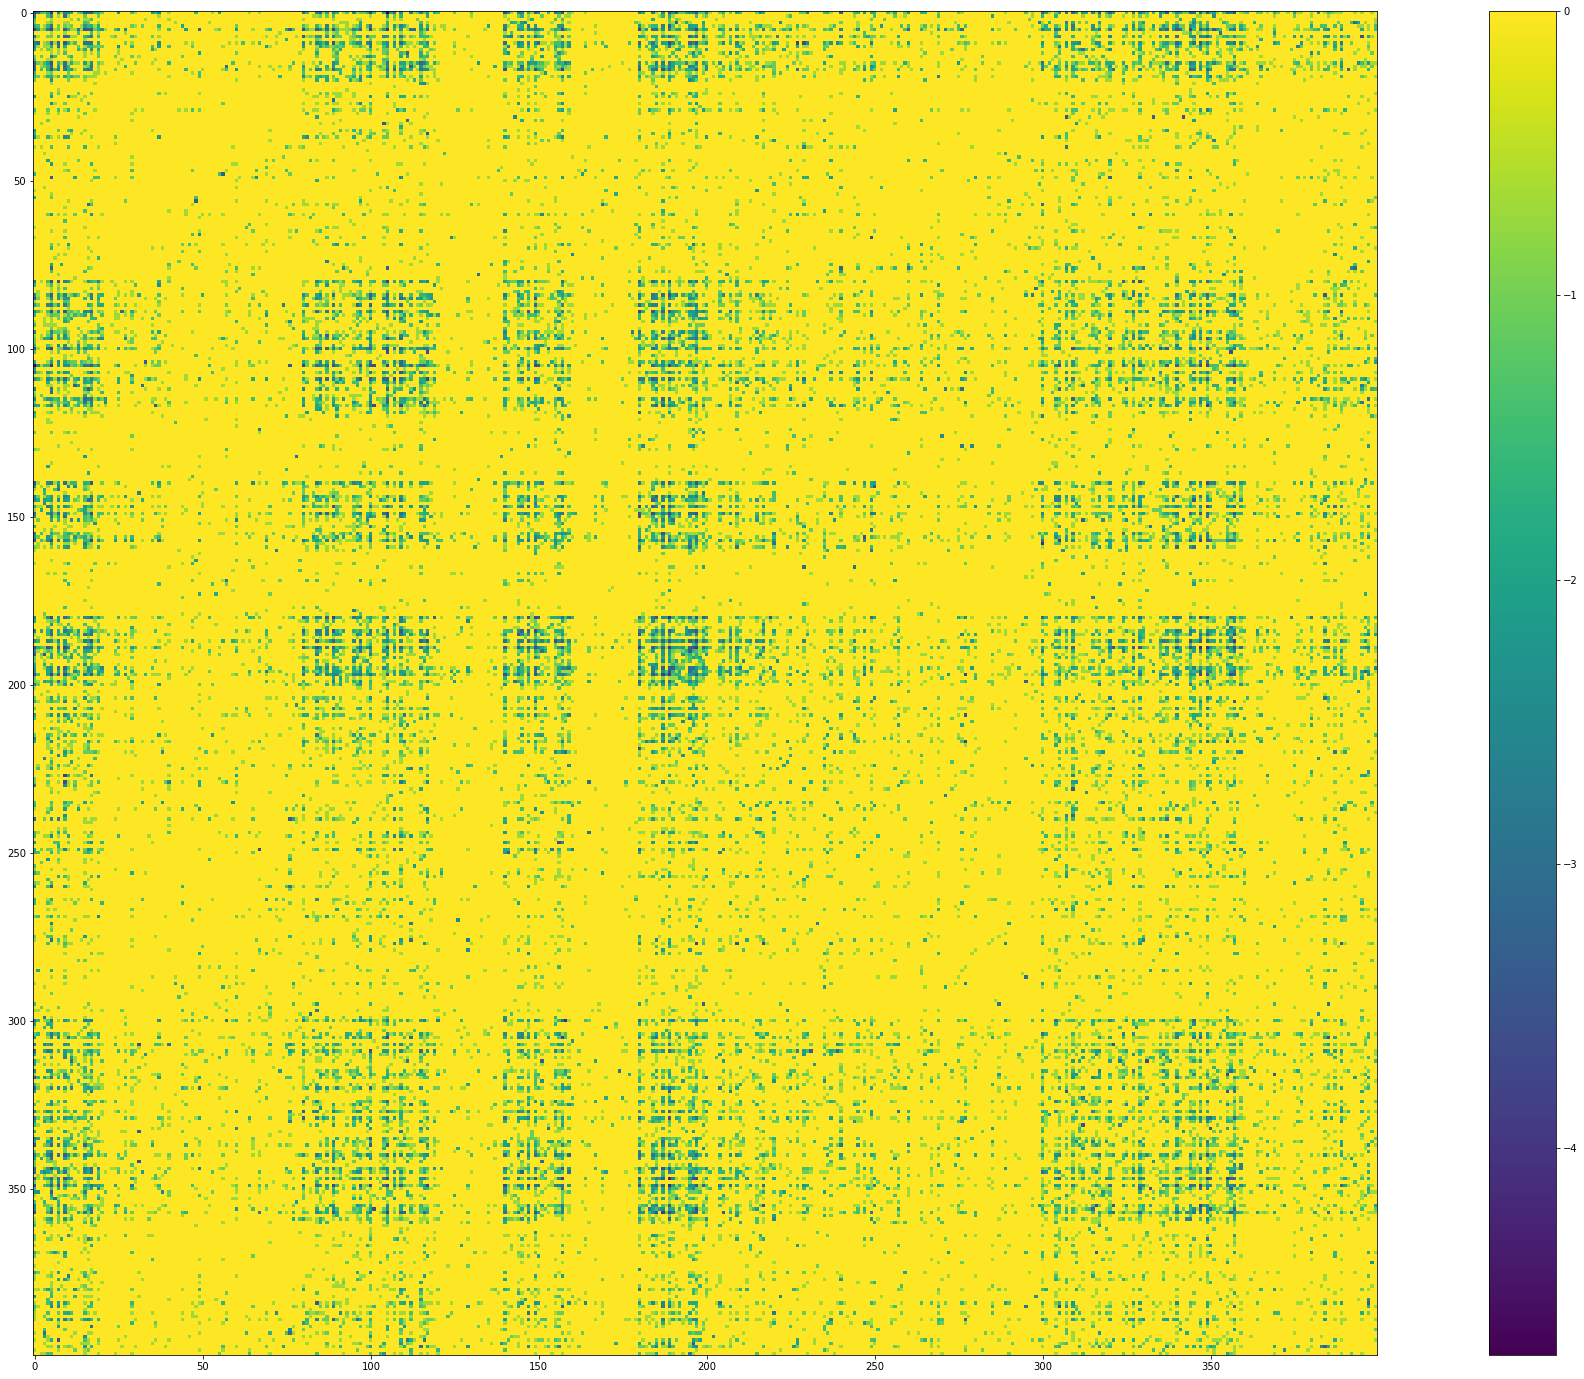

In [199]:
plt.imshow(X)
plt.colorbar()

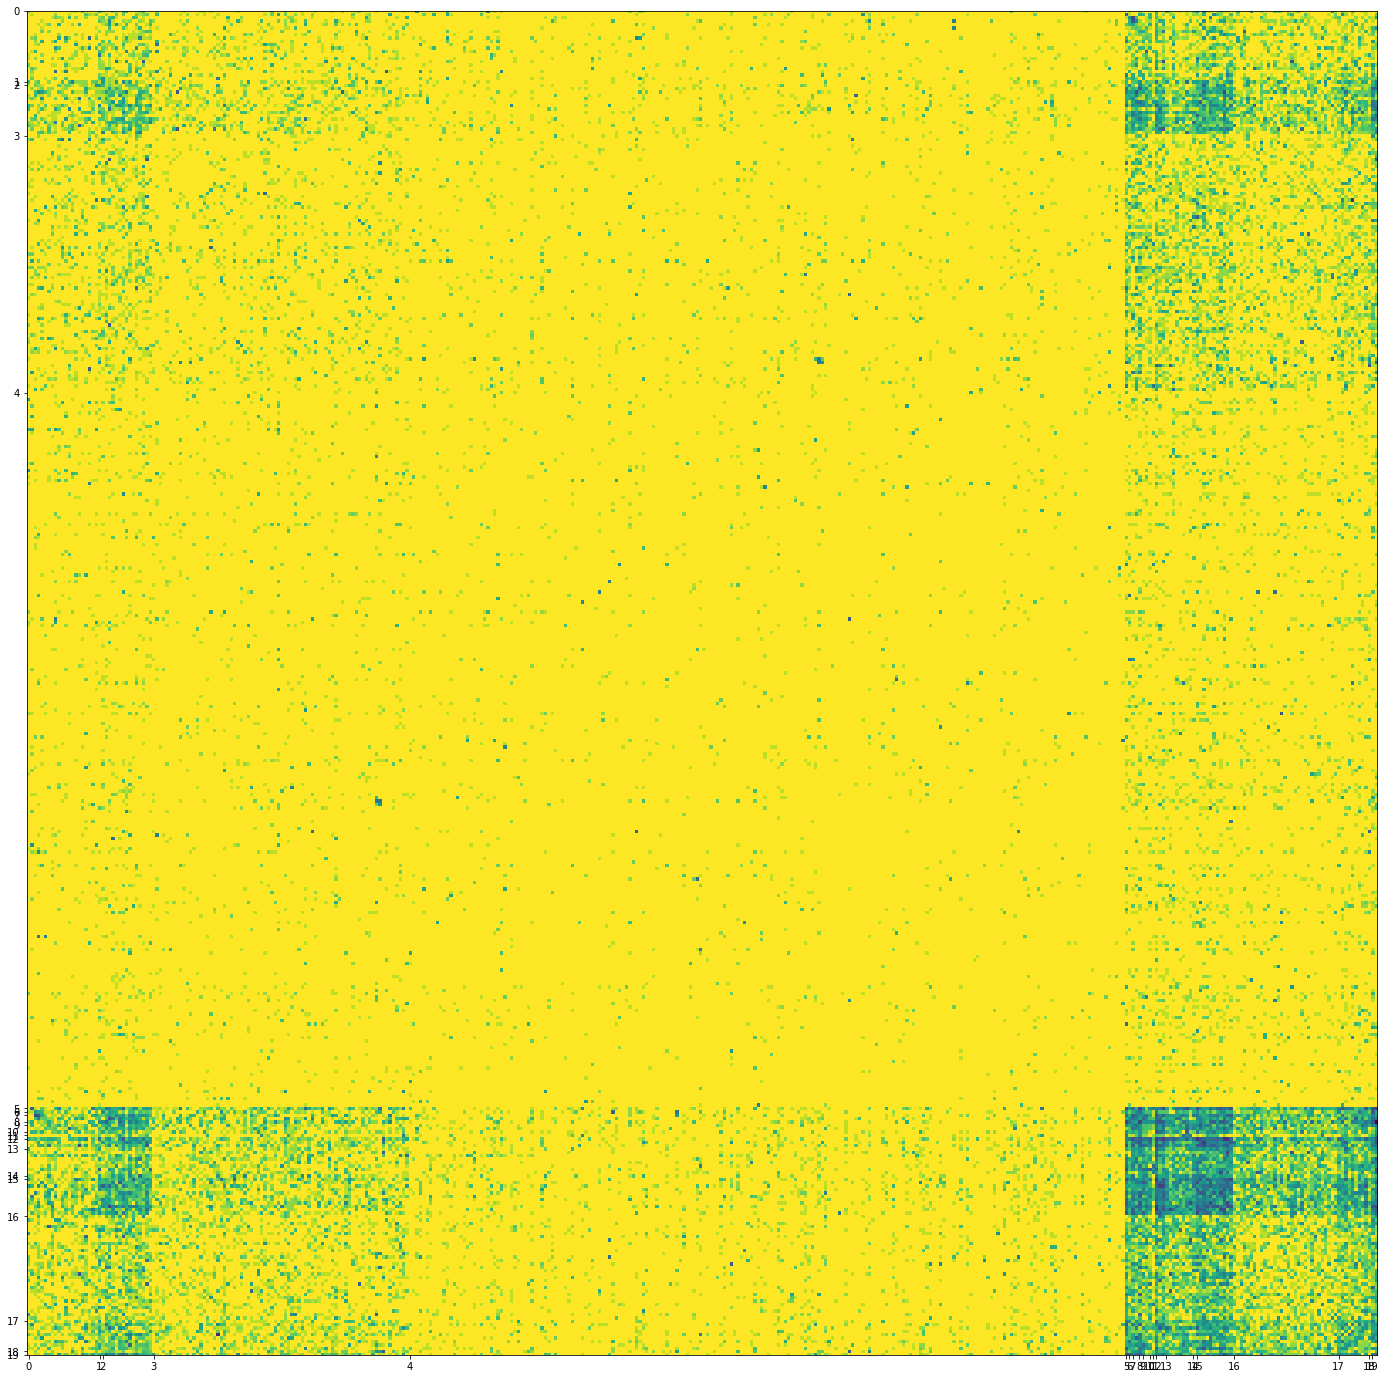

In [183]:
x_label = kmeans.predict(X)
sorted_label = x_label[np.argsort(x_label)]
pos_list = []
new_label = []
for i, label in enumerate(sorted_label):
    if sorted_label[i] == sorted_label[i-1]:
        pass
    else:
        new_label.append(sorted_label[i])
        pos_list.append(i)
plt.rcParams['figure.figsize'] = 4* np.array([10,6.180])    #golden ratio
t = para_table_log[np.argsort(x_label)][:,np.argsort(x_label)]
plt.imshow(t)
_ = plt.xticks(pos_list, new_label)
_ = plt.yticks(pos_list, new_label)

In [161]:
b.sort_values("Protein")

,Res1,Res2,Direction,Protein,Res1_1,Res1_2,Res2_1,Res2_2,Res2_letter,Res1_letter
28748,397,399,anti,1,TYR,VAL,TYR,TYR,TYR_TYR,TYR_VAL
25241,259,284,anti,1,PRO,TYR,PHE,ARG,ARG_PHE,PRO_TYR
25240,259,280,anti,1,ARG,ALA,TYR,PRO,PRO_TYR,ARG_ALA
25239,259,277,anti,1,GLN,VAL,TYR,PRO,PRO_TYR,GLN_VAL
25238,259,260,parallel,1,PRO,TYR,GLN,ALA,GLN_ALA,PRO_TYR
...,...,...,...,...,...,...,...,...,...,...
19710,182,309,anti,105,LEU,ASP,LEU,SER,SER_LEU,LEU_ASP
119,0,105,parallel,112,ALA,ALA,GLY,GLY,GLY_GLY,ALA_ALA
20615,189,197,anti,119,LEU,LEU,VAL,LEU,LEU_VAL,LEU_LEU
20786,189,349,anti,128,LEU,LEU,LEU,VAL,VAL_LEU,LEU_LEU


In [169]:
b.shape

(28749, 10)

In [167]:
b.query("Protein > 1").shape

(17928, 10)

In [168]:
b.query("Protein > 5").shape

(6510, 10)

In [170]:
b.query("Protein > 10").shape

(2947, 10)

In [176]:
b.query("Protein > 20").shape

(975, 10)

In [177]:
b.query("Protein > 30").shape

(421, 10)

In [178]:
b.query("Protein > 40").shape

(175, 10)

In [ ]:
b.query("Protein > 50")

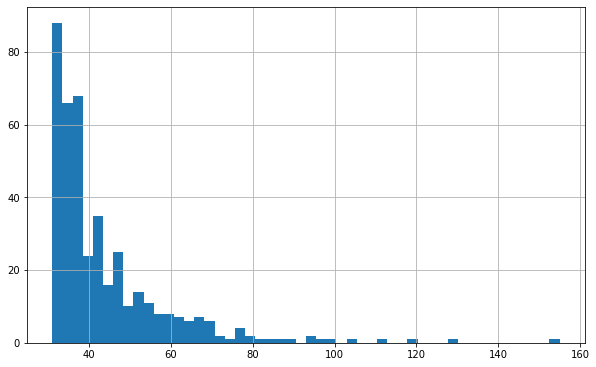

In [175]:
b.query("Protein > 30")["Protein"].hist(bins=50)

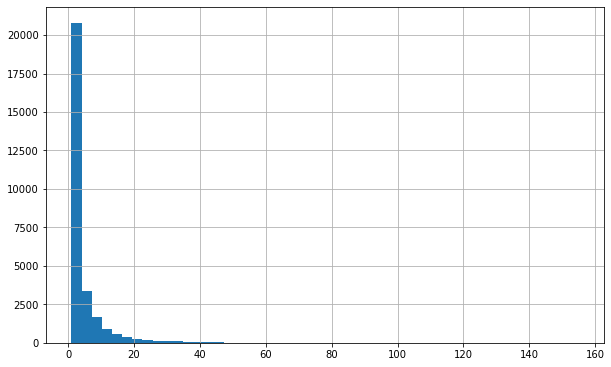

In [165]:
b["Protein"].hist(bins=50)

In [164]:
b.query("Res1_1=='GLY' and Res2_1 =='GLY' and Res2_2 =='GLY'")

,Res1,Res2,Direction,Protein,Res1_1,Res1_2,Res2_1,Res2_2,Res2_letter,Res1_letter
12348,101,105,anti,6,GLY,CYS,GLY,GLY,GLY_GLY,GLY_CYS
12349,101,105,parallel,36,GLY,CYS,GLY,GLY,GLY_GLY,GLY_CYS
12441,102,105,anti,2,GLY,ASP,GLY,GLY,GLY_GLY,GLY_ASP
12808,105,105,anti,23,GLY,GLY,GLY,GLY,GLY_GLY,GLY_GLY
12809,105,105,parallel,43,GLY,GLY,GLY,GLY,GLY_GLY,GLY_GLY
12810,105,107,anti,22,GLY,ILE,GLY,GLY,GLY_GLY,GLY_ILE
12811,105,107,parallel,6,GLY,ILE,GLY,GLY,GLY_GLY,GLY_ILE
12813,105,109,anti,24,GLY,LEU,GLY,GLY,GLY_GLY,GLY_LEU
12814,105,109,parallel,22,GLY,LEU,GLY,GLY,GLY_GLY,GLY_LEU
12815,105,110,anti,6,GLY,MET,GLY,GLY,GLY_GLY,GLY_MET


In [154]:
s4

,index,Index1_1,Res1_1,Index2_1,Res2_1,Index1_2,Res1_2,Index2_2,Res2_2,Res1,Chain1,Res2,Chain2,rij,rij_2,Protein,Direction,interaction_index,code,pair
41,319,209,MET,252,PHE,213,ILE,248,VAL,44,B,91,B,5.343194,5.318576,3cap,anti,12,301,3cap_B
42,320,209,MET,256,LEU,213,ILE,252,PHE,44,B,95,B,6.288851,6.254056,3cap,anti,12,301,3cap_B
43,321,212,LEU,252,PHE,216,GLY,248,VAL,47,B,91,B,4.410215,5.070871,3cap,anti,77,100201,3cap_B
44,326,213,ILE,253,THR,217,PHE,249,PHE,48,B,92,B,5.502128,6.142965,3cap,anti,39,10102,3cap_B
45,336,216,GLY,248,VAL,220,ASN,244,ASP,51,B,87,B,5.070871,3.861909,3cap,anti,76,100120,3cap_B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746515,2277753,555,LEU,748,THR,559,PHE,752,ALA,317,B,681,B,5.458916,5.365570,6c96,parallel,58,20101,6c96_B
746516,2277757,558,VAL,748,THR,562,PHE,752,ALA,320,B,681,B,4.720123,4.583742,6c96,parallel,58,20101,6c96_B
746517,2277758,558,VAL,752,ALA,562,PHE,756,GLU,320,B,685,B,5.797050,5.380803,6c96,parallel,40,10111,6c96_B
746518,2277779,601,TYR,639,ALA,605,LEU,643,LEU,480,B,519,B,5.407334,5.468802,6c96,parallel,42,10201,6c96_B


In [91]:
interaction_count.query("Protein==100")

,index,Protein
527,2yn9,100
528,4fi3,100
529,5zmw,100
530,6roj,100
531,5i20,100


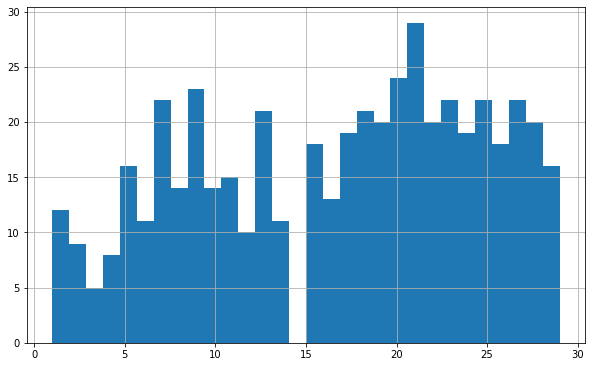

In [92]:
interaction_count.query("Protein < 30")["Protein"].hist(bins=30)

In [35]:
selected.query("Protein=='3cap' and Chain1 == 'A' and Chain2 == 'A'").shape

(60, 20)

In [36]:
selected.query("Protein=='3cap' and Chain1 == 'B' and Chain2 == 'B'").shape

(66, 20)

In [19]:
selected_chain

,Protein,level_1,Chain1
0,1a91,0,A
1,1aig,0,M
2,1aij,0,L
4,1ap9,0,A
7,1ar1,0,A
...,...,...,...
6822,6yc2,0,A
6826,6yc3,0,C
6828,6yc4,0,D
6830,7prc,0,L


In [68]:
data.shape

(746520, 19)

In [69]:
selected.shape

(600246, 19)

In [2]:
gamma = np.loadtxt("/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/cluster20.dat")

In [13]:
info = pd.read_csv("/Users/weilu/Research/database/gxxxg_index_dic_v5.csv", index_col=0)
interaction_index_dic = {}
n = 20
for i, line in info.iterrows():
    # print(i, line["i"])
    interaction_index_dic[f"{line['Direction']}_{line['i']}"] = line["Group"]

In [16]:
info.query("Group == 3")

,index,i,res1,res2,order,Direction,Group
0,7,0,ALA,ALA,4977.0,parallel,3
5,15,5,ALA,GLY,3880.0,parallel,3
100,11,100,GLY,ALA,4249.0,parallel,3
105,1,105,GLY,GLY,6447.0,parallel,3
540,23,140,ILE,ALA,5883.0,anti,3
590,47,190,LEU,MET,3904.0,anti,3
599,65,199,LEU,TYR,2999.0,anti,3
609,51,209,MET,LEU,3680.0,anti,3


In [4]:
from Bio.PDB.Polypeptide import one_to_index
from Bio.PDB.Polypeptide import three_to_index

def get_400_based_index(res1_1, res1_2):
    index = three_to_index(res1_1)*20 + three_to_index(res1_2)
    return index
def get_overall_index_v5(index1, index2, direction, interaction_index_dic):
    n = 20
    # plus 1, total parameters. 21*20/2 = 210
    n_shift = 210
    new_index1 = interaction_index_dic[f"{direction}_{index1}"]
    new_index2 = interaction_index_dic[f"{direction}_{index2}"]
    if new_index1 > new_index2:
        new_index1, new_index2 = new_index2, new_index1
    overall_index = ((2*n-(new_index1-1))*(new_index1)/2 + new_index2 - new_index1)
    if direction == "anti":
        overall_index += n_shift
    return int(overall_index)

def get_interaction_index_from_four_residues_v5(res1_1, res1_2, res2_1, res2_2, direction, interaction_index_dic=interaction_index_dic):

    index1 = get_400_based_index(res1_1, res1_2)
    if direction == "parallel":
        index2 = get_400_based_index(res2_1, res2_2)
    elif direction == "anti":
        index2 = get_400_based_index(res2_2, res2_1)
    else:
        print("unknown direction")
        raise
    index = get_overall_index_v5(index1, index2, direction, interaction_index_dic)

    return index

In [10]:
info_ = []
for i in range(20):
    for j in range(20):
        for i2 in range(20):
            for j2 in range(20):
                res1_1 = index_to_three(i)
                res1_2 = index_to_three(j)
                res2_1 = index_to_three(i2)
                res2_2 = index_to_three(j2)
                for direction in ["parallel", "anti"]:
                    index = get_interaction_index_from_four_residues_v5(res1_1, res1_2, res2_1, res2_2, direction)
                    info_.append([res1_1, res1_2, res2_1, res2_2, direction, index, gamma[index]])

In [12]:
data = pd.DataFrame(info_, columns=["Res1_1", "Res1_2", "Res2_1", "Res2_2", "Direction", "index", "Gamma"])

In [15]:
data

,Res1_1,Res1_2,Res2_1,Res2_2,Direction,index,Gamma
0,ALA,ALA,ALA,ALA,parallel,57,8.779705
1,ALA,ALA,ALA,ALA,anti,417,1.934393
2,ALA,ALA,ALA,CYS,parallel,40,1.030494
3,ALA,ALA,ALA,CYS,anti,352,1.961727
4,ALA,ALA,ALA,ASP,parallel,64,0.480636
...,...,...,...,...,...,...,...
319995,TYR,TYR,TYR,VAL,anti,348,1.796842
319996,TYR,TYR,TYR,TRP,parallel,50,0.678103
319997,TYR,TYR,TYR,TRP,anti,243,1.806623
319998,TYR,TYR,TYR,TYR,parallel,39,0.907575


In [5]:
res1_1 = "GLY"
res1_2 = "GLY"
res2_1 = "GLY"
res2_2 = "GLY"
direction = "parallel"
get_interaction_index_from_four_residues_v5(res1_1, res1_2, res2_1, res2_2, direction)

57

In [6]:
gamma[57]

8.779705104234676

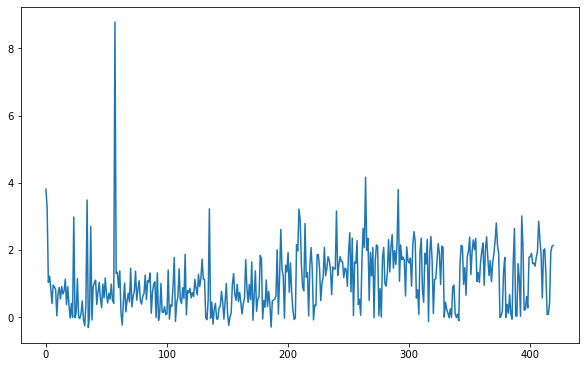

In [8]:
plt.plot(gamma)

In [34]:
def compute_gxxxg_energy(structure, gamma, n_parameters, detailedOutput=False, sequence=None, get_interaction_index=get_interaction_index_from_four_residues_v5):
    res_list = get_res_list(structure)
    neighbor_list = get_neighbor_list(structure)
    if sequence is None:
        sequence = get_sequence_from_structure(structure)

    min_seq_sep = 10
    r_min = 2.0
    r_max = 6.5
    kappa = 5
    info_list = []
    get_distance_between_two_residues = get_interaction_distance_com
    phi_gxxxg_well = np.zeros(n_parameters)

    e_gxxxg = 0.0
    e_gxxxg_parallel = 0.0
    e_gxxxg_anti_parallel = 0.0
    data_info = []
    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)
        for res2 in get_neighbors_within_radius(neighbor_list, res1, r_max+2.0):
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)
            res2globalindex = get_global_index(res_list, res2)

            for shift_to_res2_2, direction in zip([-4, 4], ["anti", "parallel"]):
                res1_2_globalindex = res1globalindex + 4
                res1_2 = get_res_by_globalindex(res_list, res1_2_globalindex, res1chain)
                # for shift_to_res2_2 in [-4, 4]:

                # consider parallel, and anti-parallel.
                res2_2_globalindex = res2globalindex + shift_to_res2_2
                res2_2 = get_res_by_globalindex(res_list, res2_2_globalindex, res2chain)
                if res1_2 == -1 or res2_2 == -1:
                    continue
                if direction == "parallel":
                    sep = res2globalindex - res1globalindex
                elif direction == "anti":
                    sep = res2_2_globalindex - res1globalindex
                if sep >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
                    rij = get_distance_between_two_residues(res1, res2)

                    rij_2 = get_distance_between_two_residues(res1_2, res2_2)
    #                 if rij_2 > (r_max+2):
    #                     continue
                    resName_1_1 = one_to_three(sequence[res1globalindex])
                    resName_1_2 = one_to_three(sequence[res1_2_globalindex])
                    resName_2_1 = one_to_three(sequence[res2globalindex])
                    resName_2_2 = one_to_three(sequence[res2_2_globalindex])
                    # interaction_index = get_interaction_index_from_four_residues(res1.resname, res1_2.resname, res2.resname, res2_2.resname)
                    # interaction_index = get_interaction_index_from_four_residues_v2(resName_1_1, resName_1_2, resName_2_1, resName_2_2)
                    interaction_index = get_interaction_index(resName_1_1, resName_1_2, resName_2_1, resName_2_2, direction)
                    phi_ = interaction_well(rij, r_min, r_max, kappa) * interaction_well(rij_2, r_min, r_max, kappa)
                    # phi_gxxxg_well[interaction_index] += phi_
                    if shift_to_res2_2 == -4:
                        e_gxxxg_anti_parallel += gamma[interaction_index] * phi_
                    else:
                        e_gxxxg_parallel += gamma[interaction_index] * phi_
                    if abs(phi_) > 0.1:
                        data_info.append([res1globalindex, res2globalindex, res1index, res2index, resName_1_1, resName_1_2, resName_2_1, resName_2_2, direction, gamma[interaction_index], interaction_index, phi_])
                    # print(res1globalindex, res2globalindex, resName_1_1, resName_2_1, gamma[interaction_index], phi_)
    e_gxxxg = e_gxxxg_parallel + e_gxxxg_anti_parallel
    # print(e_gxxxg)
    if detailedOutput:
        return pd.DataFrame(data_info, columns=["g_index_1", "g_index_2", "res1_index", "res2_index", "resName_1_1", "resName_1_2", "resName_2_1", "resName_2_2", "direction", "gamma", "interaction_index", "phi"])
    else:
        return e_gxxxg

In [35]:
# fileLocation = "/Users/weilu/Research/server/jul_week1_2020/decoyN2000_gxxxg_shuffle_optimization/optimization_decoyN2000/gammas/filtered_protein_list_phi_gxxxg_v2_well126_gamma"
# gamma = np.loadtxt(fileLocation)
# fileLocation = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/gxxxg_701.dat"
# gamma = np.loadtxt(fileLocation)
pre = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/run3_cluster20_sideMem/1iwg/0/"
sequence = read_fasta(f"{pre}/crystal_structure.fasta")

pdb = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/run3_cluster20_sideMem/1iwg/0/lastFrame"
structure = parse_pdb(pdb)
# compute_gxxxg_energy(structure[0], -gamma, sequence=sequence)
data_info = compute_gxxxg_energy(structure[0], -gamma, n_parameters=420, detailedOutput=True, sequence=sequence)

pdb = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/run3_cluster20_sideMem/1iwg/0/crystal_structure"
structure = parse_pdb(pdb)
# compute_gxxxg_energy(structure[0], -gamma, sequence=sequence)
data_info_native = compute_gxxxg_energy(structure[0], -gamma, n_parameters=420, detailedOutput=True, sequence=sequence)





In [47]:
gamma_e100 = np.loadtxt("/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/cluster20_e100.dat")

In [48]:
# fileLocation = "/Users/weilu/Research/server/jul_week1_2020/decoyN2000_gxxxg_shuffle_optimization/optimization_decoyN2000/gammas/filtered_protein_list_phi_gxxxg_v2_well126_gamma"
# gamma = np.loadtxt(fileLocation)
# fileLocation = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/gxxxg_701.dat"
# gamma = np.loadtxt(fileLocation)
pre = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/run3_cluster20_sideMem/1iwg/0/"
sequence = read_fasta(f"{pre}/crystal_structure.fasta")

pdb = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/run3_cluster20_sideMem/1iwg/0/lastFrame"
structure = parse_pdb(pdb)
# compute_gxxxg_energy(structure[0], -gamma, sequence=sequence)
data_info = compute_gxxxg_energy(structure[0], -gamma_e100, n_parameters=420, detailedOutput=True, sequence=sequence)

pdb = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/run3_cluster20_sideMem/1iwg/0/crystal_structure"
structure = parse_pdb(pdb)
# compute_gxxxg_energy(structure[0], -gamma, sequence=sequence)
data_info_native = compute_gxxxg_energy(structure[0], -gamma_e100, n_parameters=420, detailedOutput=True, sequence=sequence)






In [52]:
# fileLocation = "/Users/weilu/Research/server/jul_week1_2020/decoyN2000_gxxxg_shuffle_optimization/optimization_decoyN2000/gammas/filtered_protein_list_phi_gxxxg_v2_well126_gamma"
# gamma = np.loadtxt(fileLocation)
# fileLocation = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/gxxxg_701.dat"
# gamma = np.loadtxt(fileLocation)

pre = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/run3_cluster20_sideMem/1j4n/0/"
sequence = read_fasta(f"{pre}/crystal_structure.fasta")

pdb = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/run3_cluster20_sideMem/1j4n/0/lastFrame"
structure = parse_pdb(pdb)
# compute_gxxxg_energy(structure[0], -gamma, sequence=sequence)
data_info = compute_gxxxg_energy(structure[0], -gamma_e100, n_parameters=420, detailedOutput=True, sequence=sequence)

pdb = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/run3_cluster20_sideMem/1j4n/0/crystal_structure"
structure = parse_pdb(pdb)
# compute_gxxxg_energy(structure[0], -gamma, sequence=sequence)
data_info_native = compute_gxxxg_energy(structure[0], -gamma_e100, n_parameters=420, detailedOutput=True, sequence=sequence)







In [53]:
(data_info["gamma"] * data_info["phi"]).sum()

-85.36374508950735

In [54]:
(data_info_native["gamma"] * data_info_native["phi"]).sum()

-24.82048004442975

In [59]:
data_info_native.sort_values("gamma").shape

(44, 12)

In [60]:
data_info.sort_values("gamma").shape

(76, 12)

In [61]:
data_info.sort_values("gamma")

,g_index_1,g_index_2,res1_index,res2_index,resName_1_1,resName_1_2,resName_2_1,resName_2_2,direction,gamma,interaction_index,phi
59,66,98,67,99,GLY,GLY,ALA,GLY,parallel,-8.389636,57,0.852191
55,62,98,63,99,ALA,GLY,ALA,GLY,parallel,-8.389636,57,0.996956
35,30,111,31,112,GLY,PRO,SER,SER,parallel,-3.383749,0,0.884399
33,24,103,25,104,SER,ALA,ALA,THR,parallel,-3.099911,209,0.998538
75,80,96,81,97,GLY,SER,ILE,ALA,anti,-1.762111,387,0.996650
...,...,...,...,...,...,...,...,...,...,...,...,...
20,19,96,20,97,LEU,ILE,ILE,CYS,parallel,0.001655,55,0.938510
8,15,96,16,97,LEU,LEU,ILE,CYS,parallel,0.001655,55,0.999850
4,12,95,13,96,ALA,ALA,TYR,GLN,parallel,0.011323,64,0.990385
14,16,96,17,97,ALA,PHE,ILE,CYS,parallel,0.071113,56,0.999997


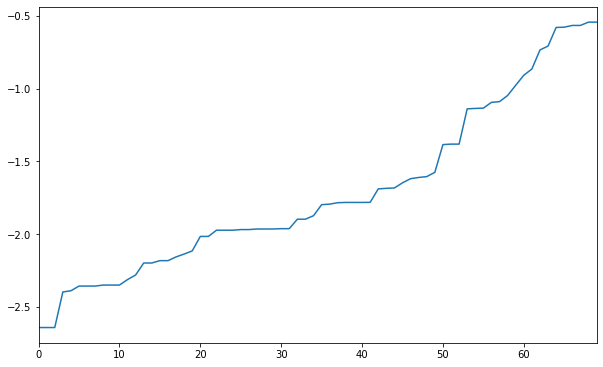

In [45]:
data_info_native.sort_values("gamma")["gamma"].reset_index(drop=True).plot()



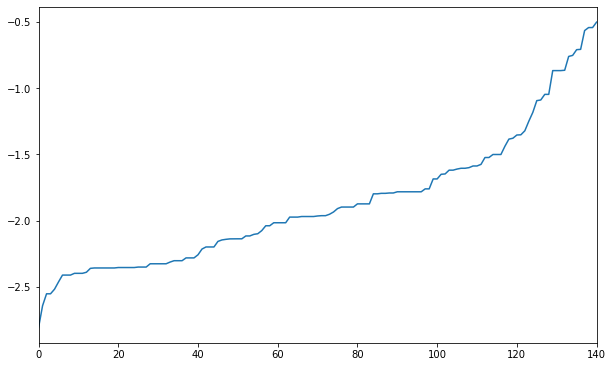

In [46]:
data_info.sort_values("gamma")["gamma"].reset_index(drop=True).plot()




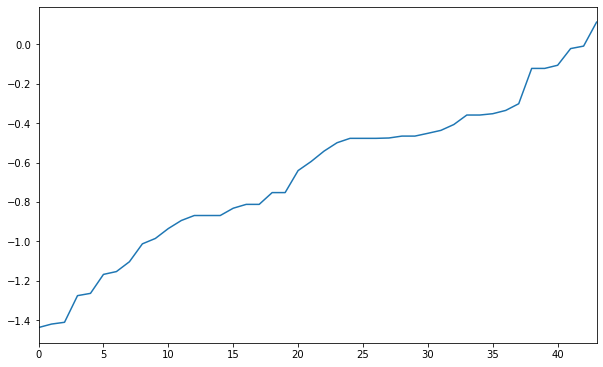

In [55]:
data_info_native.sort_values("gamma")["gamma"].reset_index(drop=True).plot()




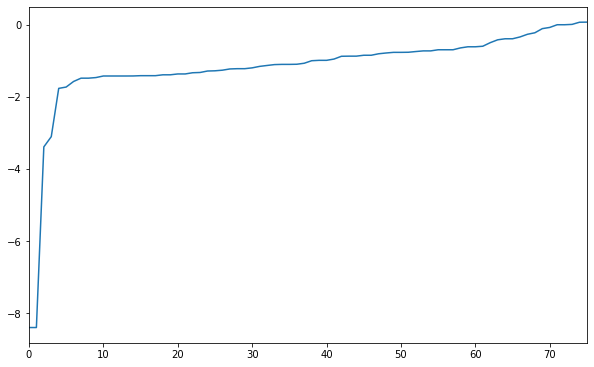

In [56]:
data_info.sort_values("gamma")["gamma"].reset_index(drop=True).plot()





In [43]:
a = pd.read_csv("/Users/weilu/Research/server/aug_2020/curated_single_chain_optimization/database/info_interaction_parallel.csv")

In [44]:
b = pd.read_csv("/Users/weilu/Research/server/aug_2020/curated_single_chain_optimization/database/info_interaction_anti_parallel.csv")

In [45]:
a["Direction"] = "parallel"
b["Direction"] = "anti"
c = pd.concat([a,b]).reset_index(drop=True)

In [46]:
c.to_csv("~/Research/database/single_chain_info_interaction.csv")

In [48]:
a = pd.read_csv("~/Research/database/single_chain_info_interaction.csv", index_col=0)

In [50]:
data["rij"].max()

6.49999703056465

In [51]:
data["rij_2"].max()

6.4999990909873056